[]

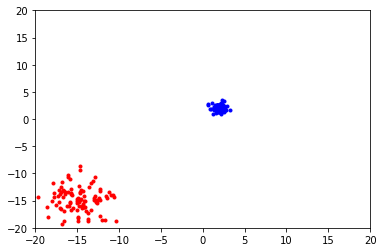

In [19]:
# <><> Gabriel Aragão - 2021 <><>
# TODO: a class for a dataset(std deviation,mean)
#     : 

# importing libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

class dataset(object):
    '''dataset class for data generation'''
    def __init__(self,desvio=None,media=None,size=None):
        self.desvio = [desvio,desvio]
        self.media  = [media,media]
        self.size   = size
        #print(np.random.normal(self.media[0],self.desvio[0],(self.size,1)))
        self.x      = np.random.normal(self.media[0],self.desvio[0],(self.size,1))
        self.y      = np.random.normal(self.media[1],self.desvio[1],(self.size,1))
        self.media  = [np.mean(self.x),np.mean(self.y)]
        self.desvio = [np.std(self.x),np.std(self.y)]
        
    def generate(self,x=None,y=None):
        '''generate object data with inputs (when provided)'''
        self.x      = np.random.normal(self.media[0],self.desvio[0],(self.size,1))
        self.y      = np.random.normal(self.media[1],self.desvio[1],(self.size,1))
        self.media  = [np.mean(self.x),np.mean(self.y)]
        self.desvio = [np.std(self.x),np.std(self.y)]
        
    def plot3d(self):
        # Surface plotting auxiliar stuff
        seqi = np.arange(0,20,0.12)
        seqj = np.arange(0,20,0.12)
        X,Y = np.meshgrid(seqi,seqj)
        plt.ion()
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        M1 = self.genSurface(correlacao=0)
        surface  = ax.plot_surface(X,Y,M1[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
        
        # Customize the z axis.
        ax.set_zlim(0,0.35)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        # Axis for interpretation only
        eixos = ['Eixo1','Eixo2']
        plt.title(eixos[0]+' vs '+eixos[1])
        plt.xlabel(eixos[1])
        plt.ylabel(eixos[0])
        plt.grid()
        plt.show()
    '''TODO: FIX ADD '''    
    def __add__(self,other):
        if self.size == other.size:
            count = 0
            x = self.x + other.x
            y = self.y + other.y
            #print(len(x))
            dataset()
            dataset.x = x
            dataset.y = y
            return dataset()

    def ls(self):
        if input('list metods & attr y/n?') == 'y':
            for attr in dir(self):
                print("obj.%s = %r" % (attr, getattr(self, attr)))

    def info(self):
        print('desvio: '+str(self.desvio))
        print('media : '+str(self.media))
        print('size  : '+str(self.size))
        if input('print y/n?') == 'y':
            print(self.x,self.y)
        if input('print 3D y/n?') == 'y':
            self.plot3d()
        if input('print Scatter y/n?') == 'y':
            print(self.x,self.y)
        
        
    # funcao densidade de probabilidade para 2 variaveis
    def pdf2var(self,x,y,p):
        u1,u2 = self.media[1],self.media[0]
        s1,s2 = self.desvio[1],self.desvio[0]
        # x ,y : indices do ponto no espaco R^2
        # u1,u2: media media de cada variavel no dataset 
        # s1,s2: desvio padrao de cada variavel no dataset
        # p    : coeficiente de correlacao 
        A = (1/(2*np.pi*s1*s2*np.sqrt(1-(p**2))))
        B = ((-(1)/(2*(1-(p**2)))))
        C = ((x-u1)**2)/((s1**2))
        D = (((y-u2)**2)/((s2)**2))
        E = ((-2*p*(x-u1)*(y-u2))/(s1*s2)) #termo de covariancia
        return A*np.exp(B*(C+D+E))
    # mesuring probability surface for both datasets
    def genSurface(self,correlacao):
        seqi = np.arange(0,6,0.12)
        seqj = np.arange(0,6,0.12)
        surface = [np.zeros([len(seqi),len(seqj)])]
        ci = 0
        for i in seqi:
            ci = ci + 1
            cj = 0
            for j in seqj:
                cj = cj + 1
                aux  = self.pdf2var(i,j,correlacao)
                #print(ci,cj,'--',aux)
                M1[0][ci-1][cj-1] = aux
                #print('M1',ci,cj,'--',M1[ci-1][cj-1])
        return surface
        


# Dataset creation
gaussianA = dataset(media=-15,desvio=2,size=100)
#gaussianA.generate()
#gaussianA.info()
#gaussianA.ls()
gaussianB = dataset(media=2,desvio=0.5,size=100)

#gaussian_B.generate()
#gaussian_B.info()
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.scatter(gaussianA.x,gaussianA.y,color='r',marker='.')
plt.plot()
plt.scatter(gaussianB.x,gaussianB.y,color='b',marker='.')
plt.plot()




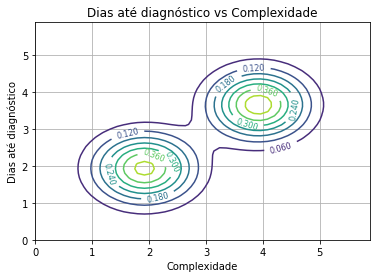

In [42]:
# printing first frame of data sequence
M1, M2 = genSurface(mgenA,dgenA,mgenB,dgenB,correlacao, M1, M2)
#surface  = ax.plot_surface(X,Y,M1[0]+M2[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig, ax = plt.subplots()
CS = plt.contour(X,Y,M1[0]+M2[0])
ax.clabel(CS,inline=1,fontsize=8)
plt.plot()
#plt.contour(X,Y,M2[0])
#plt.scatter(xgenA,ygenA, color = 'r',marker =".")
plt.plot()
#plt.scatter(xgenB,ygenB, color = 'g',marker ='.')

# axis for interpretation only
eixos = ['Dias até diagnóstico','Complexidade']
plt.title(eixos[0]+' vs '+eixos[1])
plt.xlabel(eixos[1])
plt.ylabel(eixos[0])
plt.grid()

plt.show()
#plt.pause(10)

[3.9195057037644108, 3.9655878652071648] [0.9772821252505568, 0.9818783714177521]
[1.8898456614699644, 1.9746667478257458] [0.9895301714153109, 1.073600091031829]


NameError: name 'genSurface' is not defined

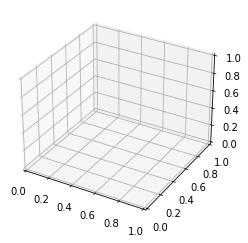

In [12]:


# defining mean and standard deviation

mu = 0.5
sigma = 0.1

# setup random module


numPoints = 200

# generating data set A
xgenA = np.random.normal(mu*8,sigma*10,(numPoints,1))
ygenA = np.random.normal(mu*8,sigma*10,(numPoints,1))

# calculando media (mgenA) e desvio (dgenA) estimado do data set A
mgenA = [np.mean(xgenA),np.mean(ygenA)]
dgenA = [np.std(xgenA) ,np.std(ygenA) ]
print(mgenA,dgenA)

# gen data set B
xgenB = np.random.normal(mu*4,sigma*10,(numPoints,1))
ygenB = np.random.normal(mu*4,sigma*10,(numPoints,1))

# calculando media e desvio estimado do data set B
mgenB = [np.mean(xgenB),np.mean(ygenB)]
dgenB = [np.std(xgenB) ,np.std(ygenB) ]
print(mgenB,dgenB)

# generate evenly spaced points
seqi = np.arange(0,6,0.12)
seqj = np.arange(0,6,0.12)
X,Y = np.meshgrid(seqi,seqj)

M1 = [np.zeros([len(seqi),len(seqj)])]
M2 = [np.zeros([len(seqi),len(seqj)])]



plt.ion()
fig = plt.figure()
ax = fig.gca(projection='3d')
# dataset params
correlacao = 0.9
steps = 20

M1, M2 = genSurface(mgenA,dgenA,mgenB,dgenB,correlacao, M1, M2)
surface  = ax.plot_surface(X,Y,M1[0]+M2[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
# Customize the z axis.
ax.set_zlim(0,0.35)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# axis for interpretation only
eixos = ['Dias até diagnóstico','Complexidade ']
plt.title(eixos[0]+' vs '+eixos[1]+'- Correlacao:'+str(correlacao))
plt.xlabel(eixos[1])
plt.ylabel(eixos[0])
plt.grid()
#input('press enter to continue')


plt.show()

In [ ]:
# funcao densidade de probabilidade para 2 variaveis
def pdf2var(x,y,u1,u2,s1,s2,p):
    # x ,y : indices do ponto no espaco R^2
    # u1,u2: media media de cada variavel no dataset 
    # s1,s2: desvio padrao de cada variavel no dataset
    # p    : coeficiente de correlacao 
    A = (1/(2*np.pi*s1*s2*np.sqrt(1-(p**2))))
    B = ((-(1)/(2*(1-(p**2)))))
    C = ((x-u1)**2)/((s1**2))
    D = (((y-u2)**2)/((s2)**2))
    E = ((-2*p*(x-u1)*(y-u2))/(s1*s2)) #termo de covariancia
    return A*np.exp(B*(C+D+E))
    

In [ ]:
# mesuring probability surface for both datasets
def genSurface(mgenA,dgenA,mgenB,dgenB,correlacao,M1,M2):
    ci = 0
    mgenA[0] -= 0.03
    for i in seqi:
        ci = ci + 1
        cj = 0
        for j in seqj:
            cj = cj + 1
            
            aux  = pdf2var(i,j,mgenA[0],mgenA[1],dgenA[0],dgenA[1],correlacao)
            aux2 = pdf2var(i,j,mgenB[0],mgenB[1],dgenB[0],dgenB[1],correlacao)
            #print(ci,cj,'--', aux, aux2)
            M1[0][ci-1][cj-1] = aux
            M2[0][ci-1][cj-1] = aux2
    return M1,M2

In [ ]:
# printing first frame of data sequence

M1, M2 = genSurface(mgenA,dgenA,mgenB,dgenB,correlacao, M1, M2)
print(M1)
#surface  = ax.plot_surface(X,Y,M1[0]+M2[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig, ax = plt.subplots()
CS = plt.contour(X,Y,M1[0]+M2[0])
ax.clabel(CS,inline=1,fontsize=8)
plt.plot()
#plt.contour(X,Y,M2[0])
#plt.scatter(xgenA,ygenA, color = 'r',marker =".")
plt.plot()
#plt.scatter(xgenB,ygenB, color = 'g',marker ='.')

# axis for interpretation only
eixos = ['Dias até diagnóstico','Complexidade']
plt.title(eixos[0]+' vs '+eixos[1]+' p = '+str(correlacao))
plt.xlabel(eixos[1])
plt.ylabel(eixos[0])
plt.grid()

plt.show()

In [ ]:


# defining mean and standard deviation

mu = 0.5
sigma = 0.1

# setup random module
np.random.seed(0)
numPoints = 200

# generating data set A
xgenA = np.random.normal(mu*8,sigma*10,(numPoints,1))
ygenA = np.random.normal(mu*8,sigma*10,(numPoints,1))

# calculando media (mgenA) e desvio (dgenA) estimado do data set A
mgenA = [np.mean(xgenA),np.mean(ygenA)]
dgenA = [np.std(xgenA) ,np.std(ygenA) ]
print(mgenA,dgenA)

# gen data set B
xgenB = np.random.normal(mu*4,sigma*10,(numPoints,1))
ygenB = np.random.normal(mu*4,sigma*10,(numPoints,1))

# calculando media e desvio estimado do data set B
mgenB = [np.mean(xgenB),np.mean(ygenB)]
dgenB = [np.std(xgenB) ,np.std(ygenB) ]
print(mgenB,dgenB)

# generate evenly spaced points
seqi = np.arange(0,6,0.12)
seqj = np.arange(0,6,0.12)
X,Y = np.meshgrid(seqi,seqj)

M1 = [np.zeros([len(seqi),len(seqj)])]
M2 = [np.zeros([len(seqi),len(seqj)])]



plt.ion()
fig = plt.figure()
ax = fig.gca(projection='3d')
# dataset params
correlacao = 0.9
steps = 20

M1, M2 = genSurface(mgenA,dgenA,mgenB,dgenB,correlacao, M1, M2)
surface  = ax.plot_surface(X,Y,M1[0]+M2[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
# Customize the z axis.
ax.set_zlim(0,0.35)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# axis for interpretation only
eixos = ['Dias até diagnóstico','Complexidade ']
plt.title(eixos[0]+' vs '+eixos[1]+'- Correlacao:'+str(correlacao))
plt.xlabel(eixos[1])
plt.ylabel(eixos[0])
plt.grid()
#input('press enter to continue')


plt.show()

In [ ]:
def Multiplot(steps):
    for i in range(5):
        for j in range(2):
            axarr[j][i] = contorno(M1,M2)
    return axarr
array = Multiplot(1)




In [ ]:
M1, M2 = genSurface(mgenA,dgenA,mgenB,dgenB,correlacao, M1, M2)
surface  = ax.plot_surface(X,Y,M1[0]+M2[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
# Customize the z axis.
ax.set_zlim(0,0.5)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# axis for interpretation only
eixos = ['Dias até diagnóstico','Complexidade']
plt.title(eixos[0]+' vs '+eixos[1])
plt.xlabel(eixos[1])
plt.ylabel(eixos[0])
plt.grid()
input('press enter to continue')


plt.show()
